<a href="https://colab.research.google.com/github/5quark/Poisson-statistics/blob/master/Poisson_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this report we collected data and put into 2 seperate excel files, one column each. Here i extract data from excel file to a list:

In [3]:
import pandas as pd
import numpy as np

data_frame= pd.read_excel("10Sec.xlsx")
#this is a one column Pandas Data Frame, i will transform it to a list by:
data_10sec=data_frame["10Sec"].to_numpy()
print(data_10sec)

#same for the 1 sec 
data_frame1= pd.read_excel("1sec.xlsx")
#this is a one column Pandas Data Frame, i will transform it to a list by:
data_1sec=data_frame1["1sec"].to_numpy()
print(data_1sec)

[ 98 104 101  83  95  69 108  98 110  88  94 123  85 100 102 103  99  96
  98  88  88 105  79  91  89  86 101  86  91  99 104 111  91  99 122 117
  90 102 113 101  95 101  94  95  90  79  90  95 109  93  87 106 120  91
 107  97 117 124 100 110  94  97  95  89  95 120 109  87  95  88 100 102
  96 101  91 102 112  76 116  89 101 102  84 112 106  93 105  99 105 105
 114  96  87  95 100  77  92  91 107  95]
[ 9 12  8  2 14 12 11 15  4 15  6 10 13  7  9  8 17  9  8 11 12 10  8 12
 10 11 11 10 13  7 10 10  9  6 11 10  9  6  8  9 10  7  8 15  6  8  6 10
 12 10  9  3 11  6 10  4 11 17  9 10  9 13 13 10  8  7  9 10  5 12  8 10
  5 13  5  9 13  8  7  9 13 13 20 14  7 16  8  9 12 10  8  7 13 10 13 11
  9 11  8  8]


Now that i have my data in a proper format i can start performing my calculations on them:

In [4]:
data_10sec_sorted=np.sort(data_10sec)
print(data_10sec_sorted)

#for 1 sec
data_1sec_sorted=np.sort(data_1sec)
print(data_1sec_sorted)

[ 69  76  77  79  79  83  84  85  86  86  87  87  87  88  88  88  88  89
  89  89  90  90  90  91  91  91  91  91  91  92  93  93  94  94  94  95
  95  95  95  95  95  95  95  95  96  96  96  97  97  98  98  98  99  99
  99  99 100 100 100 100 101 101 101 101 101 101 102 102 102 102 102 103
 104 104 105 105 105 105 106 106 107 107 108 109 109 110 110 111 112 112
 113 114 116 117 117 120 120 122 123 124]
[ 2  3  4  4  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11
 11 11 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 15 15 15
 16 17 17 20]


Here we see that the smallest point is in  60s and the largest in 120s. So we can use a histogram with 7 bins to show the data. 
For the 1 sec data we see that data points are closer to each other. Let's make 10 bins for this one. 



In [5]:
#10 second data
hist_y_10s=[]
list10=[60,70,80,90,100,110,120]
for i in list10:
    hist_y_10s.append(np.sum((i-1<data_10sec) & (data_10sec<i+10))) #find the number of elements satisfying a certain condition, 59<x<70
print(hist_y_10s)
#and the errors for poisson can be taken as square root
hist_y_error_10s=np.sqrt(hist_y_10s)
print(hist_y_error_10s)


#1second data
hist_y_1s=[]
list1=[*range(2,22,2)]
for i in list1:
    hist_y_1s.append(np.sum((i-1<data_1sec) & (data_1sec<i+10))) #find the number of elements satisfying a certain condition, 59<x<70
print(hist_y_1s)
#and the errors for poisson can be taken as square root
hist_y_error_1s=np.sqrt(hist_y_1s)
print(hist_y_error_1s)




[1, 4, 15, 36, 29, 10, 5]
[1.         2.         3.87298335 6.         5.38516481 3.16227766
 2.23606798]
[74, 89, 89, 79, 51, 26, 9, 4, 1, 1]
[8.60232527 9.43398113 9.43398113 8.88819442 7.14142843 5.09901951
 3.         2.         1.         1.        ]


Now that we have all the information we need we can plot them:

Text(0, 0.5, 'Repetation of Number of Counts')

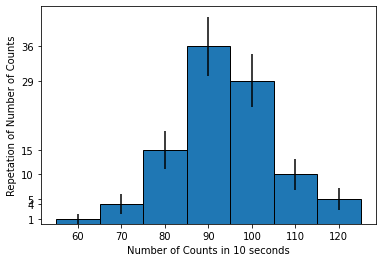

In [6]:
import matplotlib.pyplot as plt
plt.bar(list10,hist_y_10s,width=10,yerr=hist_y_error_10s,edgecolor="black")
plt.yticks(hist_y_10s)
plt.xlabel("Number of Counts in 10 seconds")
plt.ylabel("Repetation of Number of Counts")

Now i can continue and find the standard deviation $$\sigma=\sqrt{\frac{\sum{(X-\mu)^2}}{n}}$$


In [7]:
#mean
count10=0
total_10=0
for i in range(len(hist_y_10s)):
    count10+=hist_y_10s[i]
    total_10+=hist_y_10s[i]*list10[i]
mean_10=total_10/count10
print("mean is:", mean_10)
#std
from math import sqrt
b=sum((hist_y_10s-mean_10)**2)
sigma_10s=sqrt(b/7)
print("Standard deviation is:", sigma_10s)


mean is: 93.8
Standard deviation is: 80.47455675997405


Now we have standard deviation and the mean. We can fit a gaussian on to the previous bar graph.
$$Gaussian(x)=\frac{\exp(\frac{-1}{2}(\frac{x-\mu}{\sigma}))}{\sigma.\sqrt{2\pi}}$$

Mean of the distribution is  93.30838496981175 and standard deviation is  14.822823919682682 also the constant multiple is: 1.9690345523551216


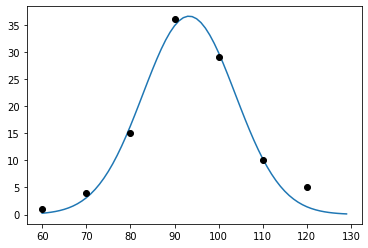

In [8]:

from scipy.optimize import curve_fit
from math import pi
def gauss(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(sigma)**2)/2*sigma*sqrt(2*pi)
popt,pcov=curve_fit(gauss,list10,hist_y_10s,p0=[1,mean_10,sigma_10s])
x_fit=np.arange(60,130,1)
plt.plot(x_fit,gauss(x_fit,*popt))
plt.plot(list10,hist_y_10s,"ok")
print("Mean of the distribution is ",popt[1],"and standard deviation is ", popt[2],"also the constant multiple is:",popt[0])

Poisson distribution is:
$$Poisson(\mu,x)=\frac{\mu^xe^{-\mu}}{x!}$$
Where $\mu$ is the average.

Mean of the distribution is  93.56606658503387 and constant multiple is:  921.9708774705208


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


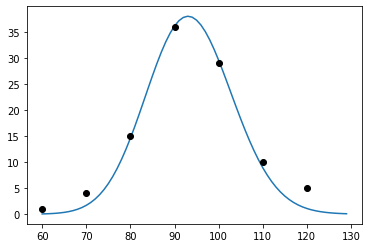

In [9]:
from scipy.optimize import curve_fit
from math import pi,exp
from scipy.special import factorial
def poisson(x,a,mu):
    return a*(mu**x)*exp(-mu)/factorial(x)
popt1,pcov1=curve_fit(poisson,list10,hist_y_10s,p0=[1,mean_10])
x_fit=np.arange(60,130,1)
plt.plot(x_fit,poisson(x_fit,*popt1))
plt.plot(list10,hist_y_10s,"ok")
print("Mean of the distribution is ",popt1[1],"and constant multiple is: ",popt1[0])

So i have all the codes that i need for fitting gaussian and poisson. Now i will combine everything.


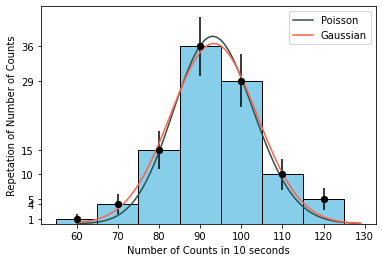

In [14]:
plt.bar(list10,hist_y_10s,width=10,yerr=hist_y_error_10s,edgecolor="black",color="skyblue")
plt.yticks(hist_y_10s)
plt.xlabel("Number of Counts in 10 seconds")
plt.ylabel("Repetation of Number of Counts")
plt.plot(x_fit,poisson(x_fit,*popt1),color="darkslategrey",label="Poisson")
plt.plot(list10,hist_y_10s,"ok")
plt.plot(x_fit,gauss(x_fit,*popt),label="Gaussian",color="tomato")
plt.plot(list10,hist_y_10s,"ok")
plt.legend()
plt.savefig("10secs")

Next we need to find chi square between gaussian dist. and observed values also between poisson dist. and observed values.
$$\chi^2=\sum{\frac{(observed-expected)^2}{expected}}$$
Here i used 7 bins on the bar chart so degree of freedom will be 7-1=6.

In [11]:
#Gausian
def gauss_y(x):
    a=popt[0]
    mu=popt[1]
    sigma=popt[2]
    return a*np.exp(-(x-mu)**2/(sigma)**2)/2*sigma*sqrt(2*pi)
gauss_y(list10)

array([ 0.23457948,  3.08593251, 16.33651938, 34.80241211, 29.83567463,
       10.29293152,  1.4289565 ])

In [12]:
#Poisson
def poisson_y(x):
    a=popt1[0]
    mu=popt1[1]
    return a*(mu**x)*exp(-mu)/factorial(x)
poisson_y(list10)

array([ 0.0474699 ,  1.69578909, 14.59596714, 36.15834427, 29.60222783,
        8.94528398,  1.0921987 ])

In [13]:
#Poisson vs observed chi square
chi_poisson_10s=np.sum((hist_y_10s-poisson_y(list10))**2/poisson_y(list10))
#Gaussian vs observed chi square
chi_gauss_10s=np.sum((hist_y_10s-gauss_y(list10))**2/gauss_y(list10))
print("Chi square: Gauss vs observed",chi_gauss_10s)
print("Chi square: Poisson vs observed",chi_poisson_10s)


Chi square: Gauss vs observed 11.874815183232514
Chi square: Poisson vs observed 36.37467094071323


Now let's do the same calculations for the 1s data:

Text(0, 0.5, 'Repetation of Number of Counts')

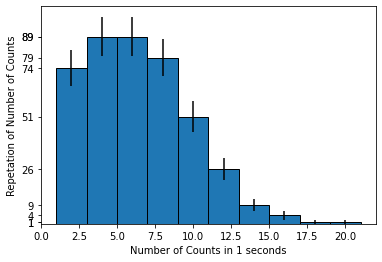

In [17]:
import matplotlib.pyplot as plt
plt.bar(list1,hist_y_1s,width=2,yerr=hist_y_error_1s,edgecolor="black")
plt.yticks(hist_y_1s)
plt.xlabel("Number of Counts in 1 seconds")
plt.ylabel("Repetation of Number of Counts")


[12.10530224  5.13542569  6.16547577]
[688.34490853   5.98725072]


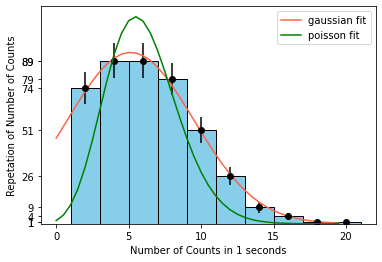

In [33]:
from scipy.optimize import curve_fit
from math import pi
#Gauss fit for 1s data
def gauss1(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(sigma)**2)/2*sigma*sqrt(2*pi)
popt,pcov=curve_fit(gauss1,list1,hist_y_1s,p0=[1,1,1])
x_fit=np.arange(0,20,0.5)
plt.plot(x_fit,gauss1(x_fit,*popt),color="tomato",label="gaussian fit")
plt.plot(list1,hist_y_1s,"ok")
#poisson 
def poisson1(x,a,mu):
    return a*(mu**x)*exp(-mu)/factorial(x)
popt1,pcov1=curve_fit(poisson1,list1,hist_y_1s,p0=[1,1])
plt.plot(x_fit,poisson1(x_fit,*popt1),color="green",label="poisson fit")
#bar chart
plt.bar(list1,hist_y_1s,width=2,yerr=hist_y_error_1s,edgecolor="black",color="skyblue")
plt.yticks(hist_y_1s)
plt.xlabel("Number of Counts in 1 seconds")
plt.ylabel("Repetation of Number of Counts")
plt.legend()
plt.savefig("1s data")
print(popt[:])
print(popt1[:])

In [35]:
#Gausian
def gauss_y1(x):
    a=popt[0]
    mu=popt[1]
    sigma=popt[2]
    return a*np.exp(-(x-mu)**2/(sigma)**2)/2*sigma*sqrt(2*pi)
gauss_y1(list1)

array([72.22466234, 90.42183804, 91.71961277, 75.37931128, 50.19300401,
       27.07916591, 11.83664025,  4.19201362,  1.20286806,  0.27964971])

In [36]:
#Poisson
def poisson_y1(x):
    a=popt1[0]
    mu=popt1[1]
    return a*(mu**x)*exp(-mu)/factorial(x)
poisson_y1(list10)

array([8.93404226e-036, 3.67360338e-046, 3.63951932e-057, 1.03779222e-068,
       9.77950776e-081, 3.40155467e-093, 4.78052619e-106])

In [37]:
#Poisson vs observed chi square
chi_poisson_1s=np.sum((hist_y_1s-poisson_y(list1))**2/poisson_y1(list1))
#Gaussian vs observed chi square
chi_gauss_1s=np.sum((hist_y_1s-gauss_y(list1))**2/gauss_y1(list1))
print("Chi square: Gauss vs observed",chi_gauss_1s)
print("Chi square: Poisson vs observed",chi_poisson_1s)

Chi square: Gauss vs observed 2.9548910776827944
Chi square: Poisson vs observed 663.6970769664168
